<a href="https://colab.research.google.com/github/Urchmedo/Restaurant-Revenue-Predictor/blob/main/Multilinear__Regression_Model__Restaurant_Revenue_Case_Study%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESTAURANT REVENUE PREDICTION MODEL** ##

# **Problem Statement** ##

* The goal is to create a model to predict restaurant revenue. Entrepreneurs in the restaurant business needs to understanding how various factors contribute to maximizing profits and managing operating costs effectively.

* The dataset used contains factors that influence a restaurant’s financial performance, which are key to making informed decisions for entrepreneurs in the fast food industry.


## **Dataset Source** ##

The data was obtain from an online repository real life data set stored in a csv file

https://www.kaggle.com/datasets/anthonytherrien/restaurant-revenue-prediction-dataset

#**Data Preprocessing and EDA**
Here, the dataset is prepared for model training by cleaning and transforming the data.

This should follow the steps below:
* import the data into the python project/environment
* Identify and address missing data
* Correlation of numerical features
  * with the target
  * with themselves
* Handling outlier values
* Explore numerical values
  * Scatter plot
  * 3d plot

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


## **Import Dataset**

We start by importing the dataset, and to do this, we need to use (import) the required library.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import pickle
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/PluralCode Data Science/restaurant_data.csv")

## **Examine the Data**


In [4]:
# examine the first few rows using head()

df.head(10)


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
5,Restaurant 5,Downtown,Indian,4.4,79,35.69,6787,75378,5,400,247.544461,2.0,8.5,Yes,27,22,644220.90
6,Restaurant 6,Rural,Mexican,4.9,49,35.30,2594,32587,11,106,206.159035,1.5,5.3,No,12,28,400348.65
7,Restaurant 7,Suburban,Japanese,4.1,61,73.65,3213,33429,14,377,135.319312,1.8,4.6,No,56,23,1014153.65
8,Restaurant 8,Rural,Japanese,4.2,37,73.75,3437,37102,18,494,55.652417,7.1,9.4,Yes,27,24,635606.10
9,Restaurant 9,Rural,French,5.0,32,59.80,2569,28419,18,907,273.944887,6.4,7.4,No,12,19,452920.65


In [5]:
# examine the last few rows using tail()

df.tail()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48
8367,Restaurant 8367,Rural,Japanese,4.0,33,71.07,2003,24268,8,197,151.838065,5.9,7.5,Yes,5,12,534142.98


In [6]:
# use info() to get a brief information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [7]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


## **Remove Irregularities**

Observed Irregularities
- null values

In [8]:
# There are several ways of addressing null values, they include:
# - drop rows with null values
# before dropping rows with null values, check the count of these rows compared to the total number of rows in the dataset


df.isnull().any(axis=1).sum()

0

Now we can see that the above dataset does not have null values

## **Exploratory Data Analysis**

Observing the "Revenue" column, since its the target vector of the datase

In [9]:
# exploring the "Revenue"

df["Revenue"]

,Revenue
0,638945.52
1,490207.83
2,541368.62
3,404556.80
4,1491046.35
...,...
8363,434653.45
8364,414977.92
8365,930395.87
8366,311493.48


In [10]:
# summary statistics...

df["Revenue"].describe()

,Revenue
count,8.368000e+03
mean,6.560706e+05
std,2.674137e+05
min,1.847085e+05
25%,4.546514e+05
50%,6.042421e+05
75%,8.130942e+05
max,1.531868e+06


Observing other columns to find the ones that fit as feature matrix columns.

A correlation heatmap is used in this kind of situation.

## **Correlation of Features**
Correlation of numerical features

- with themselves (multicollinearity)
- with the target (weak correlation: < 0.3)

In [11]:
# correlation heatmap of numerical columns in the dataset

df[["Revenue", "Rating",	"Seating Capacity",	"Average Meal Price",	"Marketing Budget",	"Social Media Followers",	"Chef Experience Years", "Number of Reviews",	"Avg Review Length",	"Ambience Score",	"Service Quality Score", "Weekend Reservations",	"Weekday Reservations"]].corr()

,Revenue,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations
Revenue,1.000000,0.009899,0.677317,0.686365,0.365322,0.354466,0.026899,-0.008233,-0.011278,0.003388,0.005375,0.292400,0.273284
Rating,0.009899,1.000000,0.004862,-0.002265,0.263448,0.289559,0.022192,-0.004238,-0.001272,0.007099,0.000887,-0.000274,0.001706
Seating Capacity,0.677317,0.004862,1.000000,-0.028809,0.509560,0.496917,0.010324,-0.016100,-0.032670,0.002842,-0.006400,0.437416,0.418636
Average Meal Price,0.686365,-0.002265,-0.028809,1.000000,-0.002054,-0.005753,0.000401,0.001802,0.016013,-0.001094,0.011714,-0.018072,-0.027837
Marketing Budget,0.365322,0.263448,0.509560,-0.002054,1.000000,0.987511,0.021612,-0.008985,-0.030064,0.008120,-0.000693,0.225355,0.221088
Social Media Followers,0.354466,0.289559,0.496917,-0.005753,0.987511,1.000000,0.022943,-0.009181,-0.025464,0.007428,0.000210,0.218451,0.214612
Chef Experience Years,0.026899,0.022192,0.010324,0.000401,0.021612,0.022943,1.000000,-0.007710,0.001865,-0.001288,-0.008508,-0.000372,-0.008823
Number of Reviews,-0.008233,-0.004238,-0.016100,0.001802,-0.008985,-0.009181,-0.007710,1.000000,0.005842,0.010186,0.005432,0.000780,-0.006126
Avg Review Length,-0.011278,-0.001272,-0.032670,0.016013,-0.030064,-0.025464,0.001865,0.005842,1.000000,0.004807,0.008836,-0.014241,-0.011020
Ambience Score,0.003388,0.007099,0.002842,-0.001094,0.008120,0.007428,-0.001288,0.010186,0.004807,1.000000,0.000612,-0.012207,-0.016652


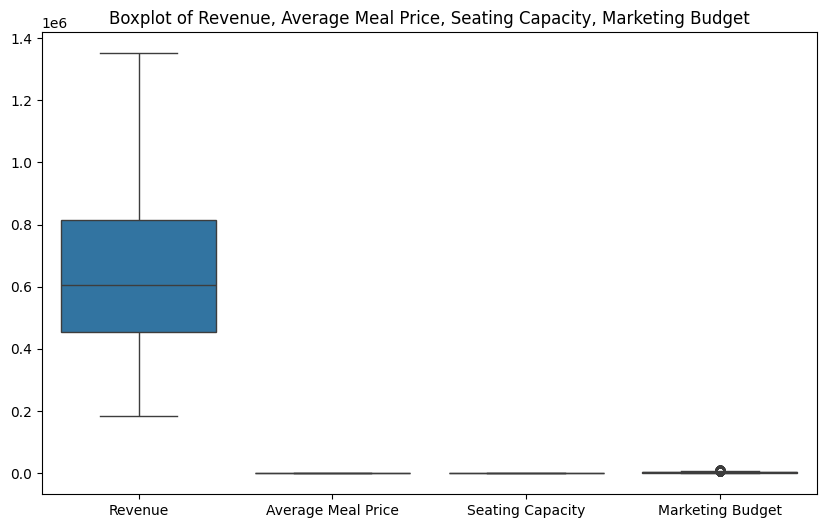

In [40]:
# prompt: boxplot of Revenue, Average Meal Price, Seating Capacity

# Boxplot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Revenue", "Average Meal Price","Seating Capacity", "Marketing Budget"]])
plt.title("Boxplot of Revenue, Average Meal Price, Seating Capacity, Marketing Budget")
plt.show()

### **Handling Outlier Values**

In [39]:
for column in df[["Revenue", "Average Meal Price","Seating Capacity"]]:

  # STEP 1: calculate 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  # print(Q1, Q3)

  # STEP 2: calculate InterQuartile Range
  IQR = Q3 - Q1

  # STEP 3: calculate upper and lower bounds
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  # STEP 4: Floor outliers (replace outlier values with upper_bound and low_bound values)
  # flooring outliers above upper bound
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  # flooring outliers below lower bound
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

## **Plotting a scatterplot to check the features**

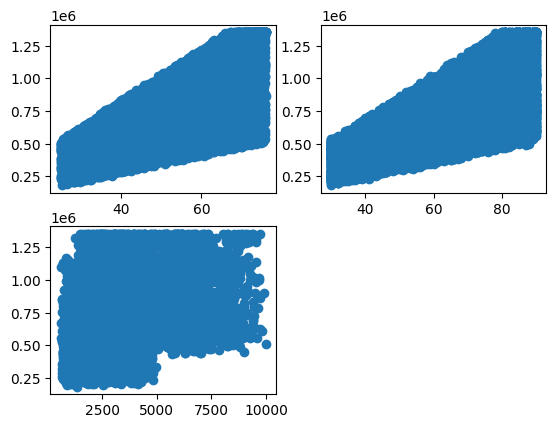

In [14]:
#plotting a scatterplot of "Revenue", "Average Meal Price","Seating Capacity"
Revenue_features = ["Average Meal Price","Seating Capacity","Marketing Budget"]
X = df[Revenue_features]
y = df["Revenue"]


plt.subplot(2,2,1)
plt.scatter(X["Average Meal Price"],y)
plt.subplot(2,2,2)
plt.scatter(X["Seating Capacity"],y)
plt.subplot(2,2,3)
plt.scatter(X["Marketing Budget"],y)
plt.show()


## **3D plotting** ##

To visualize two dependent (features) and one independent (target)

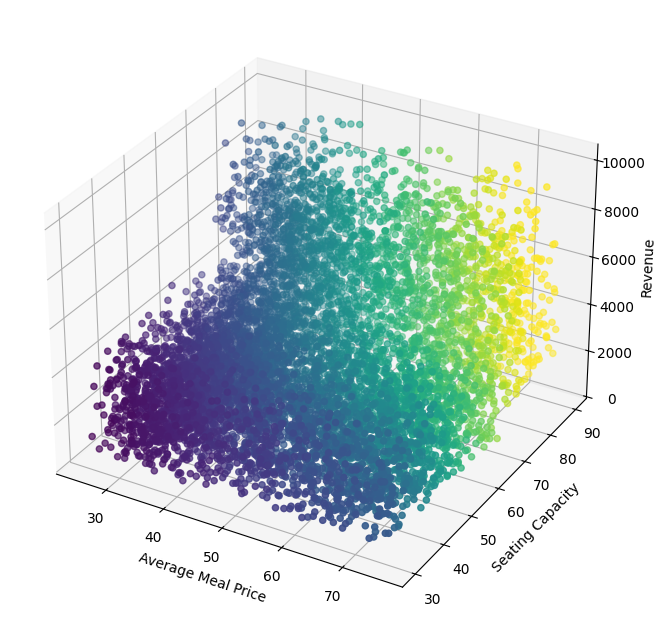

In [15]:
fig = plt.figure(10, figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
X1 = df["Average Meal Price"]
X2 = df["Seating Capacity"]
X3 = df["Marketing Budget"]
y = df["Revenue"]

ax.scatter(X1, X2, X3, c=y, cmap='viridis')
ax.set_xlabel('Average Meal Price')
ax.set_ylabel('Seating Capacity')
ax.set_zlabel('Revenue')
plt.show()


Going by the EDA done, seating capacity, average meal price and marketing budget are the most appropriate column for a Multilinear Regression model to predict restaurant revenue


## **Decide on Most Appropriate Machine Learning**

A Multi-linear regression model will be used since we are using multiple columns for the feature matrix


Train & Test Model

Before a model is created, the dataset needs to be:

- trimmed to the relevant columns,
- the trimmed data is then divided first into feature matrix and target vector,
- the data is then vertically divided into training and testing data.

In [16]:
# trimming the data to relevant columns

model_df = df[["Revenue",	"Seating Capacity",	"Average Meal Price","Marketing Budget"]]
model_df

,Revenue,Seating Capacity,Average Meal Price,Marketing Budget
0,6.389455e+05,38.0,73.98,2224
1,4.902078e+05,76.0,28.11,4416
2,5.413686e+05,48.0,48.29,2796
3,4.045568e+05,34.0,51.55,1167
4,1.350758e+06,88.0,75.98,3639
...,...,...,...,...
8363,4.346535e+05,54.0,34.85,1102
8364,4.149779e+05,49.0,36.88,1988
8365,9.303959e+05,88.0,46.87,5949
8366,3.114935e+05,31.0,44.53,707


In [17]:
# divide data into feature matrix and target vector

Revenue_feature = ["Seating Capacity",	"Average Meal Price","Marketing Budget"] # square brackets, since its a matrix
target = "Revenue"

X = model_df[Revenue_features] # model_df[["Seating Capacity",	"Average Meal Price","Marketing Budget"]]
y = model_df[target]

In [18]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(6694, 3) (1674, 3) (6694,) (1674,)


##**Create Model and Evaluate Its Performance**
Now that we have prepared the data, next is to build our model as follows:
* Create baseline
* Create, and train/fit the model
* Evaluate the performance of the model

###**Baselining**

In [19]:
# Let's create a baseline model

baseline_model = y_train.mean()

baseline_model

655892.4946452046

In [20]:
# let's create predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred[:5]

[655892.4946452046,
 655892.4946452046,
 655892.4946452046,
 655892.4946452046,
 655892.4946452046]

###**Evaluate Baseline Performance**

MAE [Mean Absolute Error] evaluation metric will be used.

In [21]:
# MAE for baseline model

baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean value of y_train values is:", round(baseline_model, 3))
print("The baseline MAE is:", round(baseline_mae, 3))

The mean value of y_train values is: 655892.495
The baseline MAE is: 215340.855


####**Create a MultiLinear Regression Model**

In [22]:
# let's create a linear regression model

model = LinearRegression()
model

LinearRegression()

####**Model Fitting (Training)**

In [23]:
# to fit a model means to train it using the X_train and y_train values

model.fit(X_train, y_train)

LinearRegression()

####**Test Model With Training Data**

In [24]:
# we'd generate predictions using X_train

model_train_pred = model.predict(X_train)

model_train_pred

array([ 994037.70307589,  470986.11656272, 1006035.7813858 , ...,
        795040.17862346,  387715.1673635 ,  788589.30270181])

####**Evaluate Model Perfomance I**

In [25]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_train_pred)

round(model_train_mae, 3)

40754.651

####**Compare Baseline MAE with Model's training MAE**

In [26]:
# print baseline and model (train) mae to compare both

print("The baseline |MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))

The baseline |MAE is:		 215340.855
The model (train) MAE is:	 40754.651


####**Test Model With Testing Data**

In [27]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([ 469746.54907051,  224663.93248203,  467852.83958161, ...,
        831051.52873098, 1081797.68885817,  972887.84766352])

####**Evaluate Model Perfomance II**

In [28]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

42388.831

####**Compare Baseline MAE, Model testing MAE and Model training MAE**

In [29]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))
print("The model (test) MAE is:\t", round(model_test_mae, 3))

The baseline MAE is:		 215340.855
The model (train) MAE is:	 40754.651
The model (test) MAE is:	 42388.831


The baseline Mean Absolute Error (MAE) of 215,340.855 represents the error of a simple model or a naive prediction method (like predicting the mean of the target variable for every instance). This gives a reference point for how well the model performs compared to a basic approach.

Train MAE (40,754.651): This indicates how well the model is performing on the training data, where it's making predictions with an error of around 40,755. This shows that the model is fitting the training data well.

Test MAE (42,388.831): This shows the error when the model is making predictions on the test data. The test error is slightly higher than the training error, which is normal, but still much lower than the baseline MAE.

## **Interpretation**
The model is performing much better than the baseline, indicating that the model has learned useful patterns in the data.
The difference between train and test MAE is relatively small, which is a good sign that the model generalizes well and isn't overfitting.


## **Model Deployment**

Deploying the model on Streamlit  requires the folowing steps:

* Save the model with pickle or any alternative library
* Save the Streamlit code in app.py file
* Create a github repository
    * upload the model file and the app.py files to the repository
    * add a requirements.txt file
* go to https://streamlit.io/cloud, create an account, and create an app
* follow the simple steps on https://streamlit.io/cloud, and your app should get deployed in a minute or less.

#####**Saving the Model using Pickle**

In [30]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [31]:
# check if model.pkl was created

!ls

drive  model.pkl  sample_data


**Save model.pkl to local drive**

In [32]:
# saving model.pkl to computer drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Streamlit Code**

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

**Save file containing Streamlit code to local drive**

In [33]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd

# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# give the Streamlit app page a title
st.title("Restaurant Revenue Predictor")

# input widget for getting user values for X (feature matrix value)
Seating_Capacity = st.slider("Seating Capacity", min_value=0, max_value=100, value=20)
Average_Meal_Price= st.slider("Average Meal Price", min_value=0, max_value=100, value=20)
Marketing_Budget = st.slider("Marketing Budget [thousand]", min_value=0, max_value=10000, value=20)



# After selesting Revenue, the user then submits the price value
if st.button("Predict"):
  # take the price value, and format the value the right way
  prediction = model.predict([[Seating_Capacity, Average_Meal_Price, Marketing_Budget]])[0].round(2)
  st.write("Expected Revenue ", prediction, "thousand dollars")

Writing app.py


In [34]:
# check if app.py has been created on google drive

!ls

app.py	drive  model.pkl  sample_data


In [35]:
# download app.py to local directory

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Requirements file**

This file should contain a list of libraries imported and used in the app.py script. This helps the Streamlit engine to download the libraries so they can be used in the application.

In [41]:
# creating the requirements.txt file

%%writefile requirements.txt
pickle4
streamlit
pandas
scikit-learn

Overwriting requirements.txt


In [37]:
# download the requirements.txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Upload Files to Github**

Now you can upload the three files to the github repository you created.